# ECE 285 Assignment 1: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [59]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [60]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [61]:
# Import more utilies and the layers you have implemented
from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD
from ece285.utils.dataset import DataLoader
from ece285.utils.trainer import Trainer


## Visualize some examples from the dataset.

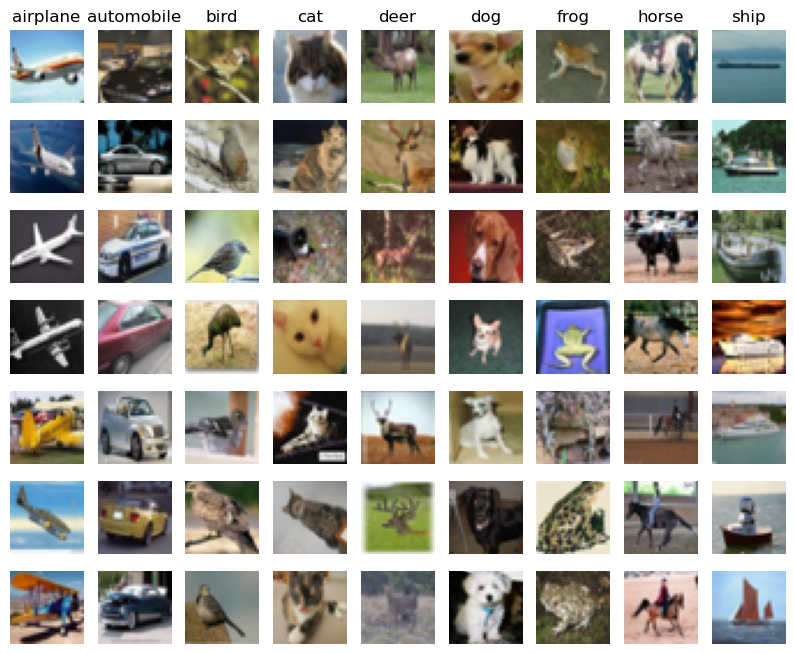

In [62]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [5]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [7]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [8]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302544
Validate Acc: 0.084
Epoch Average Loss: 2.302362
Epoch Average Loss: 2.302151
Epoch Average Loss: 2.301852
Validate Acc: 0.104
Epoch Average Loss: 2.301439
Epoch Average Loss: 2.300829
Epoch Average Loss: 2.299976
Validate Acc: 0.100
Epoch Average Loss: 2.298810
Epoch Average Loss: 2.297319
Epoch Average Loss: 2.295515
Validate Acc: 0.084
Epoch Average Loss: 2.293334
Epoch Average Loss: 2.290840
Epoch Average Loss: 2.287807
Validate Acc: 0.084
Epoch Average Loss: 2.283870
Epoch Average Loss: 2.278863
Epoch Average Loss: 2.272668
Validate Acc: 0.096
Epoch Average Loss: 2.265800
Epoch Average Loss: 2.258289
Epoch Average Loss: 2.250576
Validate Acc: 0.096
Epoch Average Loss: 2.242958
Epoch Average Loss: 2.235407
Epoch Average Loss: 2.228454
Validate Acc: 0.112
Epoch Average Loss: 2.221928
Epoch Average Loss: 2.215673
Epoch Average Loss: 2.210083
Validate Acc: 0.124
Epoch Average Loss: 2.204749
Epoch Average Loss: 2.199916
Epoch Average Loss: 2.195419
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [64]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.5252
Validation acc:  0.424


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

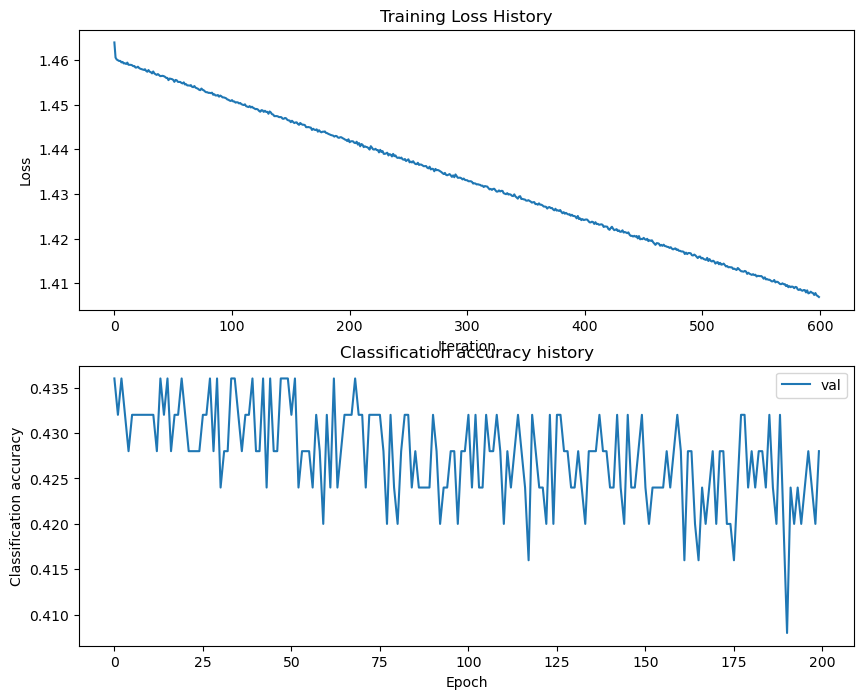

In [65]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


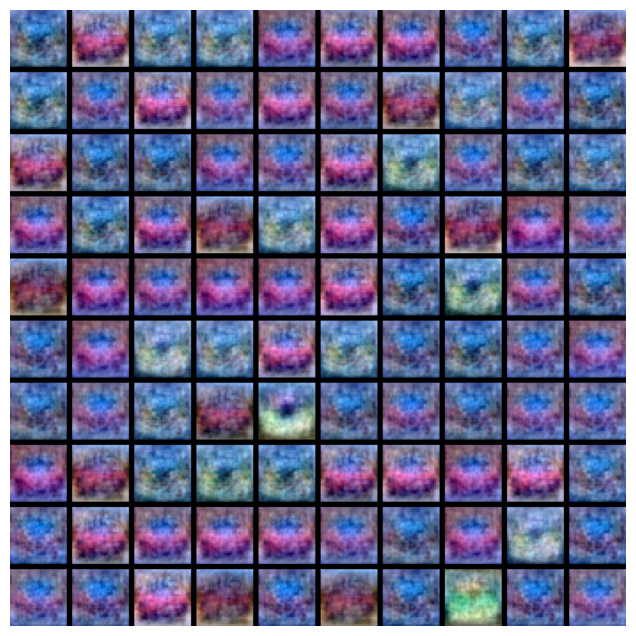

In [11]:
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:

In [134]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
second_best_hyperparams=[0.009, 0.01, 600, 80]#test acc=0.352
best_net_hyperparams = [0.009, 0.01, 600, 120] #test acc=0.362
#################################################################################

pass


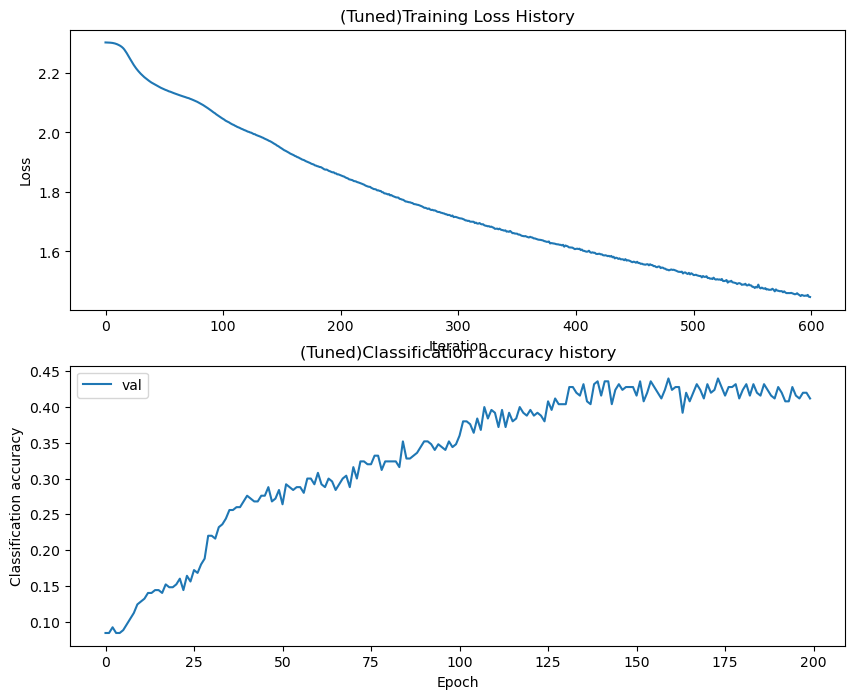

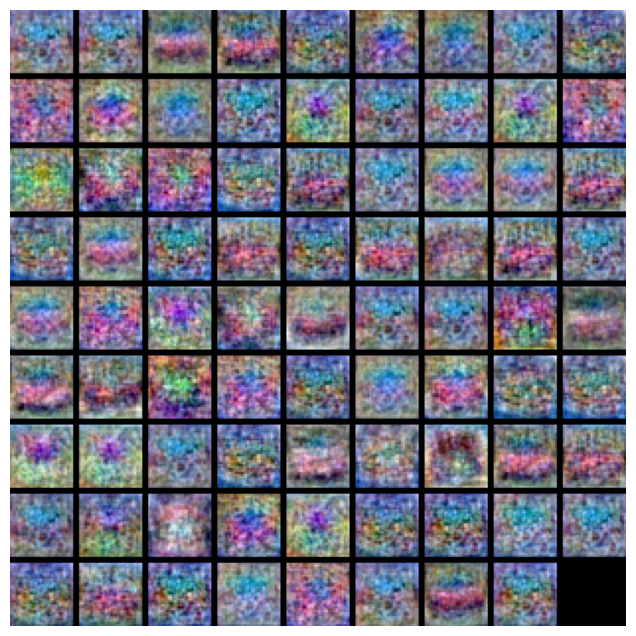

In [139]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("(Tuned)Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("(Tuned)Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()
# TODO: visualize the weights of the best network (5%)
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(best_net)

In [118]:
input_size = 3072
hidden_size = 120  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model_1():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

In [119]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
best_net = init_model_1()
optim = SGD(best_net, lr=0.009, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 600  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)

In [120]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, best_net, loss_func, epoch, batch_size, validate_interval=3
)


In [121]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302533
Validate Acc: 0.084
Epoch Average Loss: 2.302357
Epoch Average Loss: 2.302142
Epoch Average Loss: 2.301875
Validate Acc: 0.112
Epoch Average Loss: 2.301496
Epoch Average Loss: 2.300981
Epoch Average Loss: 2.300276
Validate Acc: 0.104
Epoch Average Loss: 2.299339
Epoch Average Loss: 2.298134
Epoch Average Loss: 2.296696
Validate Acc: 0.096
Epoch Average Loss: 2.295012
Epoch Average Loss: 2.293086
Epoch Average Loss: 2.290798
Validate Acc: 0.084
Epoch Average Loss: 2.288128
Epoch Average Loss: 2.284784
Epoch Average Loss: 2.280559
Validate Acc: 0.096
Epoch Average Loss: 2.275404
Epoch Average Loss: 2.269386
Epoch Average Loss: 2.262890
Validate Acc: 0.096
Epoch Average Loss: 2.256075
Epoch Average Loss: 2.249116
Epoch Average Loss: 2.242260
Validate Acc: 0.108
Epoch Average Loss: 2.235581
Epoch Average Loss: 2.229235
Epoch Average Loss: 2.223232
Validate Acc: 0.112
Epoch Average Loss: 2.217512
Epoch Average Loss: 2.212171
Epoch Average Loss: 2.207241
Validate

In [122]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = best_net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("better Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("better Validation acc: ", acc)

better Training acc:  0.4972
better Validation acc:  0.424


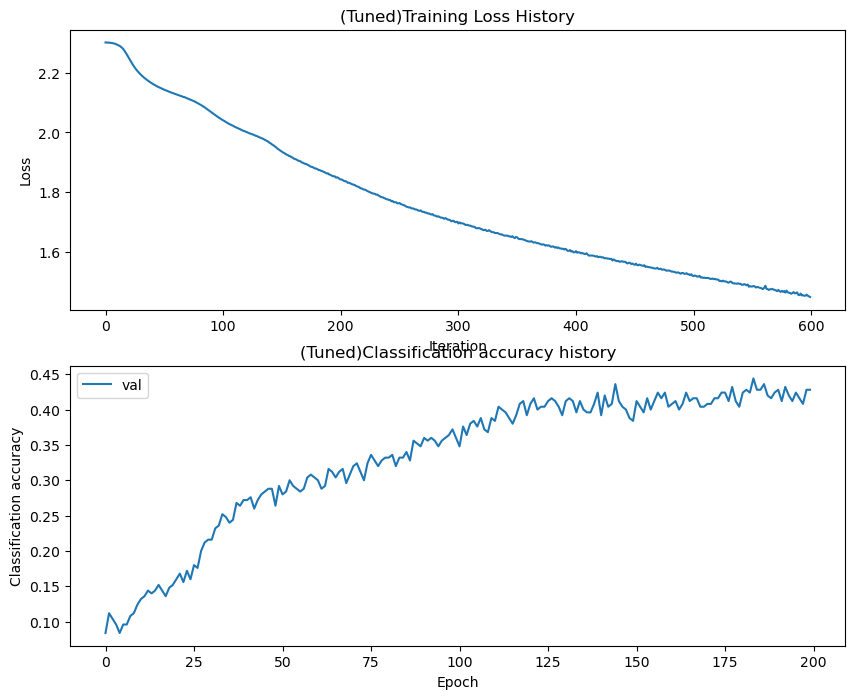

In [124]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("(Tuned)Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("(Tuned)Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()

In [140]:
input_size = 3072
hidden_size = 80  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model_1():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

In [127]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
best_net = init_model_1()
optim = SGD(best_net, lr=0.009, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 600  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)

In [128]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, best_net, loss_func, epoch, batch_size, validate_interval=3
)


In [129]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302561
Validate Acc: 0.084
Epoch Average Loss: 2.302417
Epoch Average Loss: 2.302268
Epoch Average Loss: 2.302074
Validate Acc: 0.084
Epoch Average Loss: 2.301795
Epoch Average Loss: 2.301413
Epoch Average Loss: 2.300882
Validate Acc: 0.092
Epoch Average Loss: 2.300132
Epoch Average Loss: 2.299129
Epoch Average Loss: 2.297861
Validate Acc: 0.084
Epoch Average Loss: 2.296318
Epoch Average Loss: 2.294515
Epoch Average Loss: 2.292421
Validate Acc: 0.084
Epoch Average Loss: 2.289970
Epoch Average Loss: 2.287019
Epoch Average Loss: 2.283397
Validate Acc: 0.088
Epoch Average Loss: 2.278771
Epoch Average Loss: 2.273188
Epoch Average Loss: 2.266996
Validate Acc: 0.096
Epoch Average Loss: 2.260436
Epoch Average Loss: 2.253477
Epoch Average Loss: 2.246685
Validate Acc: 0.104
Epoch Average Loss: 2.239906
Epoch Average Loss: 2.233245
Epoch Average Loss: 2.227003
Validate Acc: 0.112
Epoch Average Loss: 2.221133
Epoch Average Loss: 2.215623
Epoch Average Loss: 2.210558
Validate

In [130]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = best_net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("better Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("better Validation acc: ", acc)

better Training acc:  0.4984
better Validation acc:  0.424


In [131]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)

Test accuracy:  0.352


# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [125]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)


Test accuracy:  0.362


#### Inline Question (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

#### Your Answer:
train on a larger dataset and increase the regularization length

#### Your Explanation:
the gap between the accuracy is cause by overfitting, a larger dataset allows the neural network to learn more representative features, reducing overfitting. Increasing the regularization strength can help reduce overfitting and improve the model's generalization performance.